In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
df_ROS = pd.read_csv('../../dataset/RecurrenceOfSurgeryData.csv')
df_ROS.head(2)

,Unnamed: 0,입원기간,직업,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI,수술기법
0,0,2,자영업,10,1.0,0,0,0,60.3,66,163,16.1,12.3,2048.5,4,51.6,TELD
1,1,1,운동선수,10,1.0,0,0,0,71.7,47,171,13.7,6.4,1753.1,4,40.8,TELD


## 목표변수 검증

### Y:연속형 : 단일 변수에 대한 정규성 여부 판단
- 검증 갯수 따른 방법 선택 (레코드 갯수)
    - 5천개보다 이하 : shapiro normality test
    - 5천개보다 이상 : Anderson normality test

#### 선정 변수: 입원기간
- 분석 내용 : 입원기간이 정규 분포를 따르는가?
    - 귀무가설 : 입원기간이 정규 분포이다.
    - 대립가설 : 입원기간이 정규 분포가 아니다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=0.0이므로 대립가설 참 
    - 사실 결론 : 입원기간이 정규 분포가 아니다.

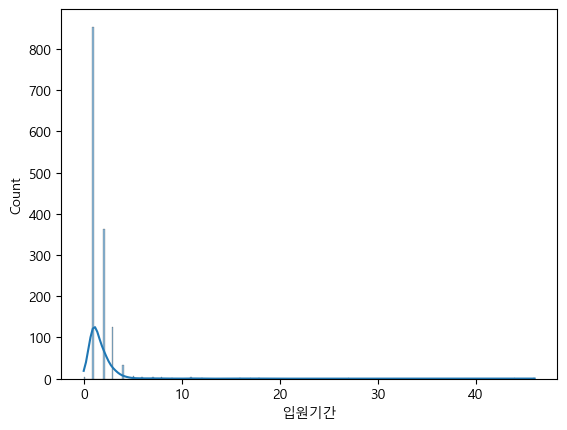

In [3]:
sns.histplot(data=df_ROS, x='입원기간', kde=True)
plt.show()

In [5]:
#df_ROS['입원기간'].isnull().sum()
df_ROS['입원기간'].count()

1405

In [9]:
stats.shapiro(df_ROS['입원기간'])

## statistic=0.2671 pvalue=0.0 -> 0.05이하로 대립가설 참 

ShapiroResult(statistic=0.26717329025268555, pvalue=0.0)

## 설명변수 검증
- '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI'

### X:연속형 / Y:연속형 : 주로 상관관계 확인 
- correlation coefficient(상관계수)
    - -1 ~ 1  
    - 0에 가까우면 관계없음, -1로 갈수록 반비례, 1로 갈수로 정비례

In [13]:
df_ROS[['입원기간','체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI']].describe()

# count 
# mean : 연속형이라는 증거 

,입원기간,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,1.720285,68.250819,40.015658,168.148043,11.360370,8.368192,1987.863423,4.525979,46.519715
std,2.218973,11.275908,13.374553,9.179564,2.909581,4.796379,308.791888,4.036717,21.737232
min,0.000000,35.000000,15.000000,140.000000,1.270000,1.000000,1145.800000,2.000000,11.900000
25%,1.000000,60.000000,30.000000,161.000000,9.500000,7.060000,1777.890000,4.000000,38.600000
50%,1.000000,68.000000,39.000000,169.000000,11.200000,8.300000,1992.260000,4.000000,45.100000
75%,2.000000,75.000000,47.000000,175.000000,13.200000,9.500000,2174.800000,4.000000,51.900000
max,46.000000,136.100000,86.000000,204.000000,22.500000,101.000000,3166.140000,45.000000,559.000000


#### 선정 변수: 입원기간, 연령
- 분석 내용 : 연령에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 연령에 따라서 입원기간 변화가 없다.
    - 대립가설 : 연령에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 대립가설 참, 상관계수 관계 없음 
    - 사실 결론 : 연령에 따라서 입원기간 변화가 있다.(statistic=0.0895, pvalue=0.00078)

In [19]:
df_ROS[['입원기간','연령']].corr()

,입원기간,연령
입원기간,1.000000,0.079106
연령,0.079106,1.000000


In [21]:
stats.spearmanr(df_ROS['입원기간'],df_ROS['연령'] )

## statistic=0.0895, pvalue=0.00078 -> 대립참, 상관계수 관계 없음 

SignificanceResult(statistic=0.08952142152561518, pvalue=0.0007813424353133282)

#### 선정 변수: 입원기간, 체중
- 분석 내용 : 체중에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 체중에 따라서 입원기간 변화가 없다.
    - 대립가설 : 체중에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참, 상관계수 관계 없음 
    - 사실 결론 : 체중에 따라서 입원기간 변화가 없다.(statistic=0.97, pvalue=0.0)

In [18]:
df_ROS[['입원기간','체중']].corr()

,입원기간,체중
입원기간,1.000000,-0.047024
체중,-0.047024,1.000000


In [15]:
# 컬럼 중 하나라도 비정규 분포이면 사용
# statistic : 상관계수값 # pvalue : 현재 대립이 참 
stats.spearmanr(df_ROS['입원기간'],df_ROS['체중'] )

##  statistic=-0.003816, pvalue=0.8863 ->  statistic=-0.003816의 값으로 0에 가까움에 따라 관계 없음,  pvalue=0.8863으로 귀무가설 참 

SignificanceResult(statistic=-0.0038167036681734214, pvalue=0.8863407659962348)

In [16]:
stats.pearsonr(df_ROS['입원기간'],df_ROS['체중'] )

PearsonRResult(statistic=-0.04702411210531448, pvalue=0.07806486259062116)